<a href="https://colab.research.google.com/github/AjitKumar-Bio/Projects/blob/main/IR_M1_with_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model


In [ ]:
# Set the paths
train_dir = '/content/drive/MyDrive/model-1_IR/train'
validation_dir = '/content/drive/MyDrive/model-1_IR/vald'
test_dir = '/content/drive/MyDrive/model-1_IR/tst'


In [ ]:
# Set the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
batch_size = 32
img_size = 224

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)


Found 196 images belonging to 2 classes.
Found 83 images belonging to 2 classes.


In [ ]:
#AlexNet another thing similar to Vgg16
base_model = VGG16(
    weights='imagenet',
    include_top=False, # whether to include the 3 fully-connected layers at the top of the network.
    input_shape=(img_size, img_size, 3)
)

x = base_model.output
x = Flatten()(x) # convert nD to 2D
x = Dense(512, activation='relu')(x) # it jst connect all the layers, 512 means 512 neurons 
x = Dropout(0.5)(x) # it drop out 50% neurons (neurons output) to avoid overfitting 
x = Dense(1, activation='sigmoid')(x) # convert any output value bw 0 and 1

model = Model(inputs=base_model.input, outputs=x)


58889256/58889256 [==============================] - 1s 0us/step


Note 1 - Optimizers are algorithms or methods that are used to change or tune the attributes of a neural network such as layer weights, learning rate, etc. in order to reduce the loss and in turn improve the model.

Adam(Adaptive Moment Estimation) is an adaptive optimization algorithm that was created specifically for deep neural network training.

https://www.geeksforgeeks.org/adam-optimizer-in-tensorflow/

Note 2 - Cross-Entropy Loss: Also known as Negative Log Likelihood. It is the commonly used loss function for classification



Note 3 - The accuracy metric measures the percentage of correctly classified samples out of the total number of samples.  it represents the percentage of true positives and true negatives among all the predictions. 

the accuracy metric is also computed at the end of each epoch to monitor the performance of the model during training.



In [ ]:
for layer in base_model.layers:
    layer.trainable = False # we are not changing the features extarcted in initial layers (from imagenet)

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print(model.optimizer.get_config())



{'name': 'Adam', 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'jit_compile': False, 'is_legacy_optimizer': False, 'learning_rate': 0.001, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}


In [ ]:
#epochs = 25

#history = model.fit(
    #train_generator,
    #steps_per_epoch=train_generator.n // batch_size,
    #epochs=epochs,
    #validation_data=validation_generator,
    #validation_steps=validation_generator.n // batch_size
#)
#model.save('/content/drive/MyDrive/MODEL-1')


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

model = tf.keras.models.load_model('/content/drive/MyDrive/MODEL-1')
model.evaluate(test_generator)



Found 33 images belonging to 2 classes.
2/2 [==============================] - 21s 895ms/step - loss: 6.0582 - accuracy: 0.0606


[6.058191299438477, 0.06060606241226196]

Note 4 - the model.predict() method expects a batch of images as input, even if the batch only contains a single image. In other words, the input to model.predict() should be a 4D tensor with shape (batch_size, img_width, img_height, channels), where batch_size is the number of images in the batch, img_width and img_height are the dimensions of the input images, and channels is the number of color channels in the images.

we convert the 3D tensor representing a single image into a 4D tensor with shape (1, img_width, img_height, channels), which can be used as input to the model.predict() method.

1/1 [==============================] - 1s 679ms/step


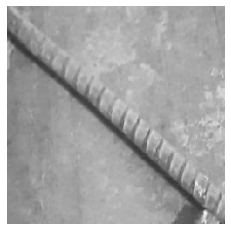

The image is of 'bar' class.


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load a new image
img_path = '/content/drive/MyDrive/model-1_IR/FT/FT_REB/61.png'
img = image.load_img(img_path, target_size=(img_size, img_size))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) #Position in the expanded axes where the new axis (or axes) is placed.
img_array /= 255.

# Use the model to make a prediction
prediction = model.predict(img_array)

# Plot the image
plt.imshow(img)
plt.axis('off')
plt.show()

if prediction < 0.5:
    print("The image is of 'cement' class.")
else:
    print("The image is of 'bar' class.")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
